In [1]:
## 기존 결과 분석에서 메트릭 분포 그래프 그리기

import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt

result_path = './results/'

data_name = "weather_96_d256_drop.1_l4_0801_iTransformer_TCN_custom_M_ft96_sl48_ll96_pl256_dm8_nh3_el1_dl256_df1_fctimeF_ebTrue_dtExp_projection_tcn-3_2_0.1_True_True_0"

files = ['metrics.npy', 'metrics_last.npy', 'pred.npy', 'true.npy']

In [2]:
# load data formula
metric_data = np.load(result_path + data_name + '/' + files[0])
metric_last_data = np.load(result_path + data_name + '/' + files[1])
pred_data = np.load(result_path + data_name + '/' + files[2])
true_data = np.load(result_path + data_name + '/' + files[3])

In [3]:
metric_data # mae, mse, rmse, mape, mspe, signed mae, sigma(3)

array([2.57759690e-01, 2.18106046e-01, 4.67018247e-01, 1.28126030e+01,
       1.66312780e+07, 5.38031058e-03, 6.71784856e-02])

In [4]:
metric_last_data # mae, mse, rmse, mape, mspe, corr, signed mae, sigma(3)

array([4.45580065e-01, 4.18353200e-01, 6.46802306e-01, 3.82047129e+00,
       2.54128125e+03, 4.40057837e-01, 5.93381897e-02, 1.34275661e-01])

In [5]:
pred_data.shape, true_data.shape # test * output_time * variable

((10444, 96, 21), (10444, 96, 21))

In [6]:
# metric 호출
from utils.metrics import *

maes = [] # 전변수 mae
mses = [] # 전변수 mse
smaes = [] # 전변수 same
corrs = [] # 전변수 corr의 중간값
sigma2s = [] # 2sigma 비율
sigma3s = [] # 3sigma 비율
maes_last = [] # 마지막변수 mae
mses_last = [] # 마지막변수 mse
corr_last = [] # 마지막변수 corr
smaes_last = [] # 마지막변수 smae
sigma2s_last = [] # 마지막변수 2sigma 비율
sigma3s_last = [] # 마지막변수 3sigma 비율

# get data
for j in range(0, len(pred_data), 20):
    # 전체 변수
    mae0 = MAE(pred_data[j, :, :], true_data[j, :, :])
    mse0 = MSE(pred_data[j, :, :], true_data[j, :, :])
    smae0 = SMAE(pred_data[j, :, :], true_data[j, :, :])
    corr0_array = np.array([np.corrcoef(pred_data[j, :, k], true_data[j, :, k])[0,1] for k in range(21)])
    corr0 = np.median(corr0_array[~np.isnan(corr0_array)])
    sigma20 = RATIO_IRR(pred_data[j, :, :], true_data[j, :, :], 2)
    sigma30 = RATIO_IRR(pred_data[j, :, :], true_data[j, :, :], 3)
    # 마지막 변수
    mae0_last = MAE(pred_data[j, :, -1], true_data[j, :, -1])
    mse0_last = MSE(pred_data[j, :, -1], true_data[j, :, -1])
    corr0_last = np.corrcoef(pred_data[j, :, -1], true_data[j, :, -1])[0,1]
    smae0_last = SMAE(pred_data[j, :, -1], true_data[j, :, -1])
    sigma20_last = RATIO_IRR(pred_data[j, :, :], true_data[j, :, :], 2)
    sigma30_last = RATIO_IRR(pred_data[j, :, :], true_data[j, :, :], 3)
    maes.append(mae0)
    mses.append(mse0)
    smaes.append(smae0)
    corrs.append(corr0)
    sigma2s.append(sigma20)
    sigma3s.append(sigma30)
    maes_last.append(mae0_last)
    mses_last.append(mse0_last)
    corr_last.append(corr0_last)
    smaes_last.append(smae0_last)
    sigma2s_last.append(sigma20_last)
    sigma3s_last.append(sigma30_last)

/home/yohan/anaconda3/envs/itransformer/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/yohan/anaconda3/envs/itransformer/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


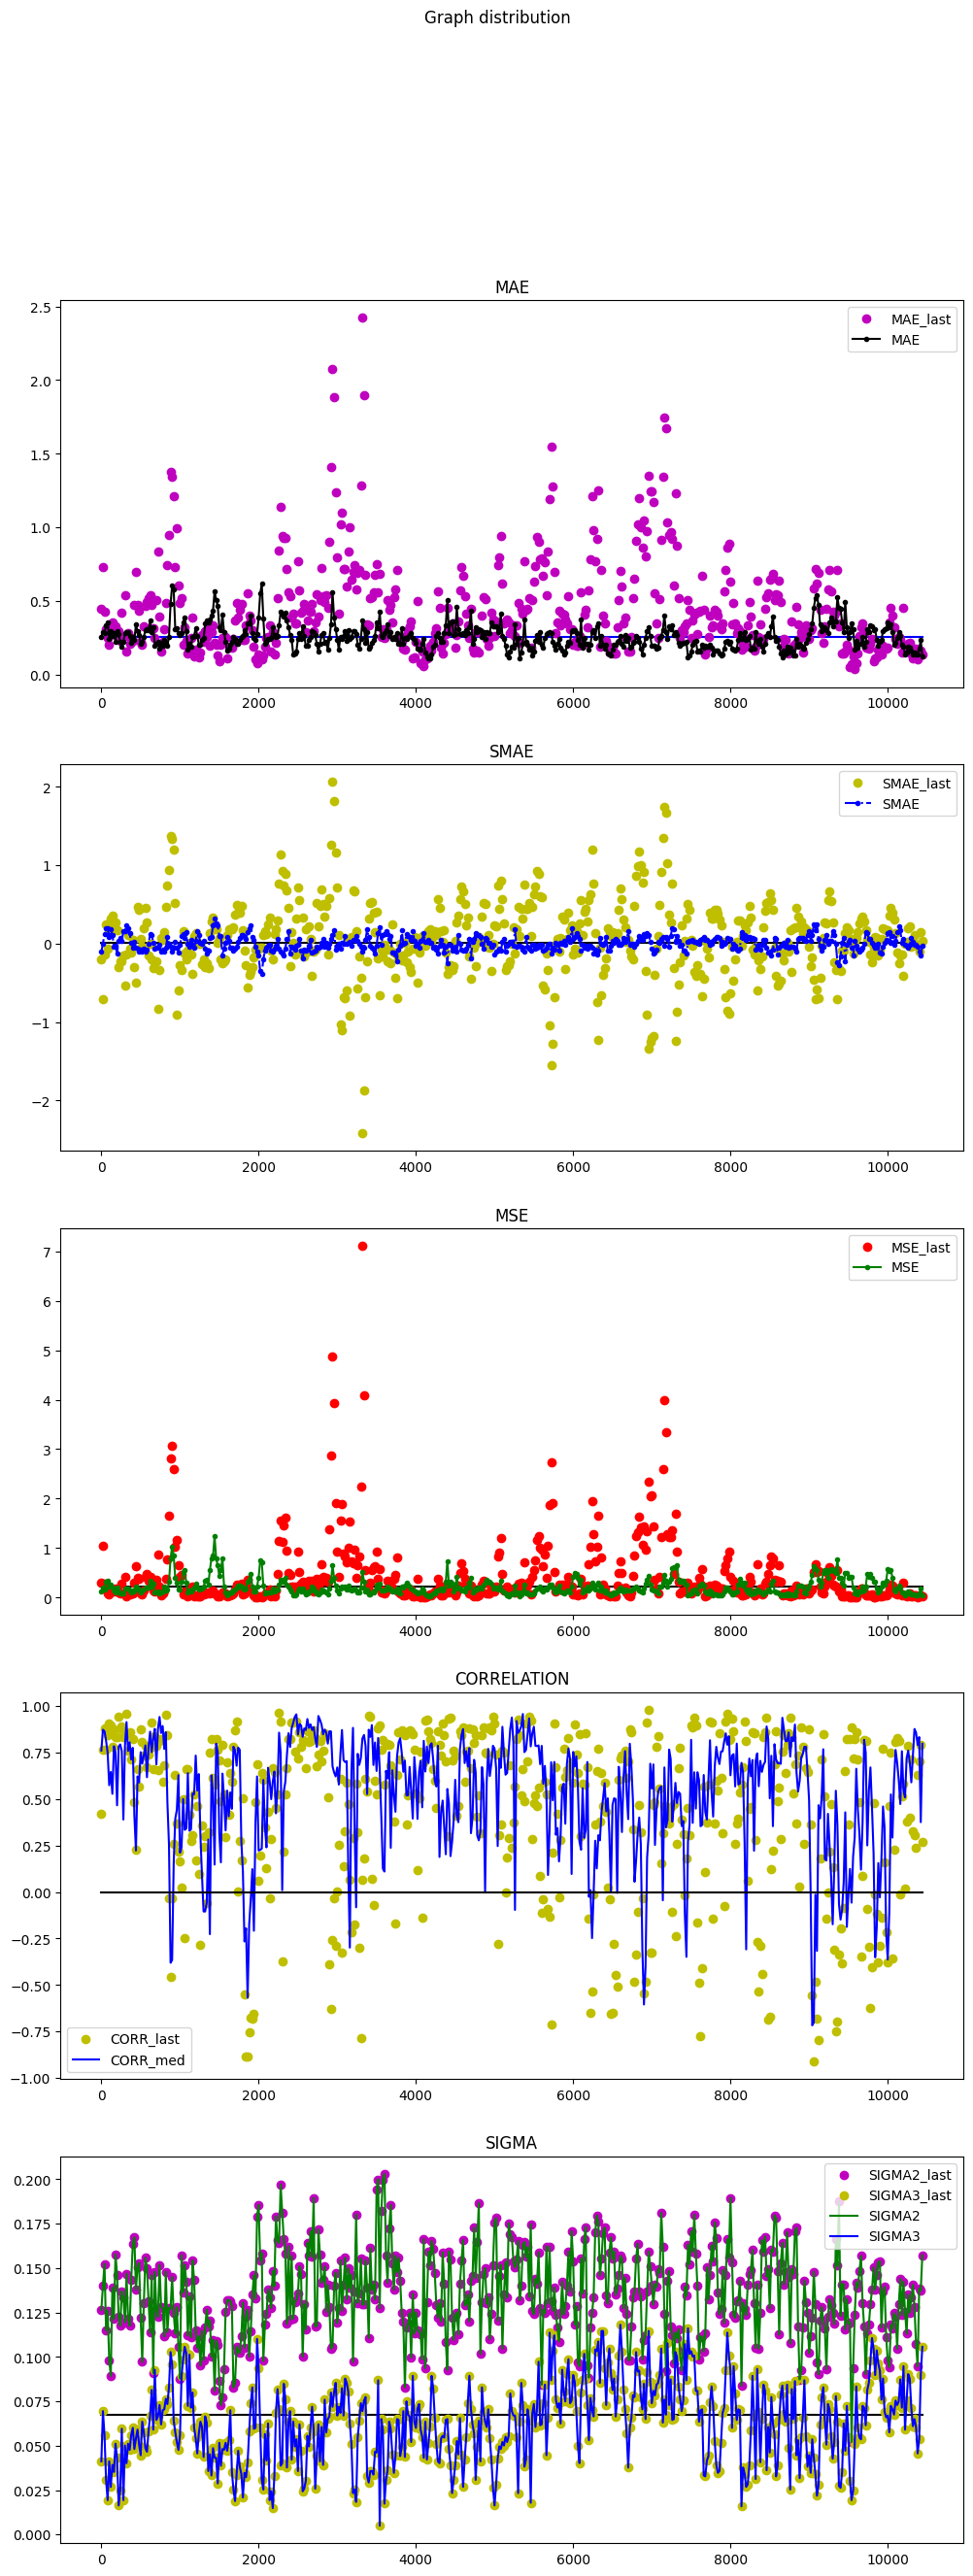

In [7]:
xlen = list(range(0, len(pred_data), 20))
# mae/mse/smae
# total : black/blue # last: red/magenta/orange

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 30))

# mae
axs[0].plot(xlen, [metric_data[0]]*len(xlen), 'b')
axs[0].plot(xlen, maes_last, 'mo', label='MAE_last') 
axs[0].plot(xlen, maes, 'k.-', label='MAE')
axs[0].set_title('MAE')
axs[0].legend()

# smae
axs[1].plot(xlen, [metric_data[5]]*len(xlen), 'k')
axs[1].plot(xlen, smaes_last, 'yo', label='SMAE_last') 
axs[1].plot(xlen, smaes, 'b.-.', label='SMAE') 
axs[1].set_title('SMAE')
axs[1].legend()

# MSE
axs[2].plot(xlen, [metric_data[1]]*len(xlen), 'k')
axs[2].plot(xlen, mses_last, 'ro', label='MSE_last')
axs[2].plot(xlen, mses, 'g.-', label='MSE')
axs[2].set_title('MSE')
axs[2].legend()

# correlation
axs[3].ylim = [0,1]
axs[3].plot(xlen, corr_last, 'yo', label= 'CORR_last')
axs[3].plot(xlen, corrs, 'b', label= 'CORR_med')
axs[3].set_title('CORRELATION')
axs[3].plot(xlen, np.zeros(len(xlen)), 'k')
axs[3].legend()

# sigma2s sigma3s
axs[4].ylim = [0, 0.25]
axs[4].plot(xlen, [metric_data[6]]*len(xlen), 'k')
axs[4].plot(xlen, sigma2s_last, 'mo', label= 'SIGMA2_last')
axs[4].plot(xlen, sigma3s_last, 'yo', label= 'SIGMA3_last')
axs[4].plot(xlen, sigma2s , 'g', label= 'SIGMA2')
axs[4].plot(xlen, sigma3s, 'b', label= 'SIGMA3')
axs[4].set_title('SIGMA')
axs[4].legend()

fig.suptitle("Graph distribution")
plt.show()


In [8]:
## 다른 데이터도 분석 - corr이 높게 나온 2sided iTrnasformer 분석
data_name = "weather_96_iTransformer_2side_iTransformer_custom_M_ft96_sl48_ll96_pl256_dm8_nh3_el1_dl256_df1_fctimeF_ebTrue_dtExp_projection_drate_tr0.7x1.0-va0.10000000000000003-te0.2-2s_0"


In [9]:
# load data formula
metric_data = np.load(result_path + data_name + '/' + files[0])
metric_last_data = np.load(result_path + data_name + '/' + files[1])
pred_data = np.load(result_path + data_name + '/' + files[2])
true_data = np.load(result_path + data_name + '/' + files[3])

In [10]:
pred_data.shape, true_data.shape # test * output_time * variable

((10541, 96, 21), (10541, 96, 21))

In [11]:
# metric 호출

maes = [] # 전변수 mae
mses = [] # 전변수 mse
smaes = [] # 전변수 same
corrs = [] # 전변수 corr의 중간값
sigma2s = [] # 2sigma 비율
sigma3s = [] # 3sigma 비율
maes_last = [] # 마지막변수 mae
mses_last = [] # 마지막변수 mse
corr_last = [] # 마지막변수 corr
smaes_last = [] # 마지막변수 smae
sigma2s_last = [] # 마지막변수 2sigma 비율
sigma3s_last = [] # 마지막변수 3sigma 비율

# get data
for j in range(0, len(pred_data), 20):
    # 전체 변수
    mae0 = MAE(pred_data[j, :, :], true_data[j, :, :])
    mse0 = MSE(pred_data[j, :, :], true_data[j, :, :])
    smae0 = SMAE(pred_data[j, :, :], true_data[j, :, :])
    corr0_array = np.array([np.corrcoef(pred_data[j, :, k], true_data[j, :, k])[0,1] for k in range(21)])
    corr0 = np.median(corr0_array[~np.isnan(corr0_array)])
    sigma20 = RATIO_IRR(pred_data[j, :, :], true_data[j, :, :], 2)
    sigma30 = RATIO_IRR(pred_data[j, :, :], true_data[j, :, :], 3)
    # 마지막 변수
    mae0_last = MAE(pred_data[j, :, -1], true_data[j, :, -1])
    mse0_last = MSE(pred_data[j, :, -1], true_data[j, :, -1])
    corr0_last = np.corrcoef(pred_data[j, :, -1], true_data[j, :, -1])[0,1]
    smae0_last = SMAE(pred_data[j, :, -1], true_data[j, :, -1])
    sigma20_last = RATIO_IRR(pred_data[j, :, :], true_data[j, :, :], 2)
    sigma30_last = RATIO_IRR(pred_data[j, :, :], true_data[j, :, :], 3)
    maes.append(mae0)
    mses.append(mse0)
    smaes.append(smae0)
    corrs.append(corr0)
    sigma2s.append(sigma20)
    sigma3s.append(sigma30)
    maes_last.append(mae0_last)
    mses_last.append(mse0_last)
    corr_last.append(corr0_last)
    smaes_last.append(smae0_last)
    sigma2s_last.append(sigma20_last)
    sigma3s_last.append(sigma30_last)

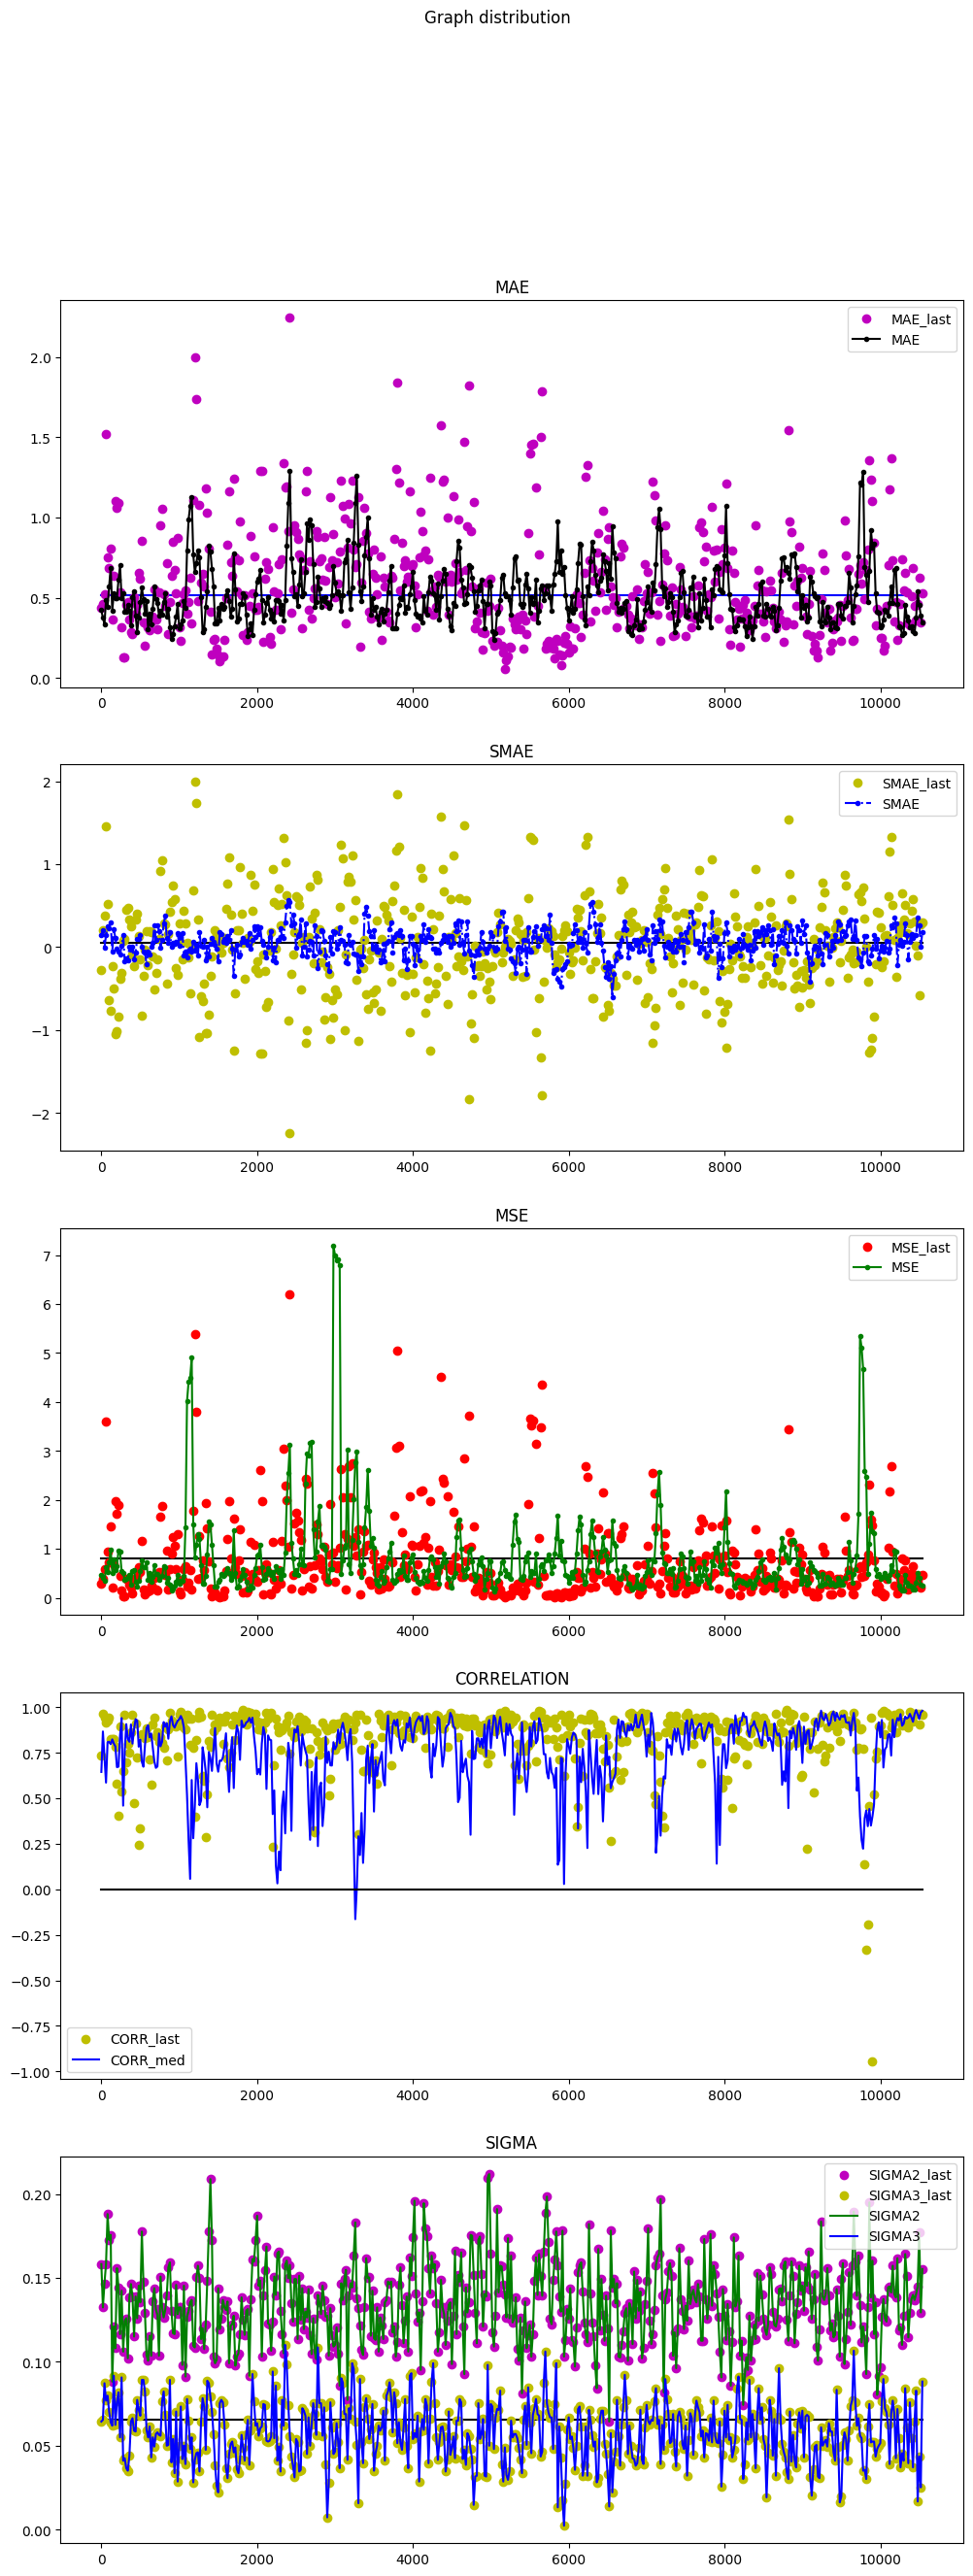

In [12]:
xlen = list(range(0, len(pred_data), 20))
# mae/mse/smae
# total : black/blue # last: red/magenta/orange

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 30))

# mae
axs[0].plot(xlen, [metric_data[0]]*len(xlen), 'b')
axs[0].plot(xlen, maes_last, 'mo', label='MAE_last') 
axs[0].plot(xlen, maes, 'k.-', label='MAE')
axs[0].set_title('MAE')
axs[0].legend()

# smae
axs[1].plot(xlen, [metric_data[5]]*len(xlen), 'k')
axs[1].plot(xlen, smaes_last, 'yo', label='SMAE_last') 
axs[1].plot(xlen, smaes, 'b.-.', label='SMAE') 
axs[1].set_title('SMAE')
axs[1].legend()

# MSE
axs[2].plot(xlen, [metric_data[1]]*len(xlen), 'k')
axs[2].plot(xlen, mses_last, 'ro', label='MSE_last')
axs[2].plot(xlen, mses, 'g.-', label='MSE')
axs[2].set_title('MSE')
axs[2].legend()

# correlation
axs[3].ylim = [0,1]
axs[3].plot(xlen, corr_last, 'yo', label= 'CORR_last')
axs[3].plot(xlen, corrs, 'b', label= 'CORR_med')
axs[3].set_title('CORRELATION')
axs[3].plot(xlen, np.zeros(len(xlen)), 'k')
axs[3].legend()

# sigma2s sigma3s
axs[4].ylim = [0, 0.25]
axs[4].plot(xlen, [metric_data[6]]*len(xlen), 'k')
axs[4].plot(xlen, sigma2s_last, 'mo', label= 'SIGMA2_last')
axs[4].plot(xlen, sigma3s_last, 'yo', label= 'SIGMA3_last')
axs[4].plot(xlen, sigma2s , 'g', label= 'SIGMA2')
axs[4].plot(xlen, sigma3s, 'b', label= 'SIGMA3')
axs[4].set_title('SIGMA')
axs[4].legend()

fig.suptitle("Graph distribution")
plt.show()
